In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

In [3]:
df.shape

(687, 38)

In [4]:
df.isnull().sum()

영화명           0
영화코드          0
개봉일           0
대표국적          0
국적            0
장르            0
등급            0
영화형태          0
영화구분          0
제작사          17
배급사           0
상영횟수          0
전국스크린수        0
전국매출액         0
전국관객수         0
서울매출액         0
서울관객수         0
F-rated       0
감독            0
대표감독          0
감독코드          0
감독성별          0
감독_대표역할       0
감독필모          0
작가           42
대표작가         42
대표작가(필명)     42
작가코드         42
작가성별         68
작가_대표역할      42
작가필모         42
배우            0
주연배우          0
배역명         166
배우코드          0
배우성별          0
배우_대표역할       0
배우필모          0
dtype: int64

In [5]:
df[df['작가성별'].isnull()]['영화명']

179                     해어화
188              극장판 안녕 자두야
198                달에 부는 바람
203               소주와 아이스크림
204                  과대망상자들
212                      사냥
213                  빅뱅 메이드
214                      경계
215                  홀리워킹데이
217       극장판 프리즘스톤 올스타 셀렉션
234            브링 홈: 아버지의 땅
246                할머니의 먼 집
247                     돈 맛
257            무현, 두 도시 이야기
265           제자도 - 제자,옥한흠2
274               나의 살던 고향은
286                     위켄즈
295        터닝메카드W: 블랙미러의 부활
297        뚜르: 내 생애 최고의 49일
304                   레이디버그
311               비정규직 특수요원
322                    더 플랜
323               마리안느와 마가렛
326           서서평, 천천히 평온하게
337          고려 아리랑: 천산의 디바
349        청춘 합창단 - 또 하나의 꿈
358                  파밍 보이즈
369             밤섬해적단 서울불바다
372    무현, 두 도시 이야기 : 파이널 컷
373                     소나기
375                  저수지 게임
376                  안녕 히어로
385                    땐뽀걸즈
386              다시 태어나도 우리
404                  올드마린보이
422         뽀로로 극장판 

In [6]:
df['F-rated'].value_counts()

0    354
1    228
2     61
3     44
Name: F-rated, dtype: int64

In [7]:
# F-rated 다시 구하기
f_rated = []
for i, row in df.iterrows():
    answer = 0
    if row['배우성별'] == '여자' : answer += 1
    if row['작가성별'] == '여자' : answer += 1
    if row['감독성별'] == '여자' : answer += 1
    f_rated.append(answer)
df['F-rated'] = f_rated

In [8]:
df['F-rated'].value_counts()

0    354
1    228
2     61
3     44
Name: F-rated, dtype: int64

In [9]:
# csv 파일에 F-rated 업데이트
# df.to_csv('../01.Data_Collection/films_updated.csv', index=False)

In [10]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

In [11]:
df.sample()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
686,벌새,20181103,2019-08-29,한국,한국,드라마,15세이상관람가,장편,독립/예술영화,에피파니(주),"(주)엣나인필름,(주)콘텐츠판다",6968.000000,145.000000,1086670065.000000,133114.000000,700341085.000000,81877.000000,3,김보라,김보라,20110847.000000,여자,감독,벌새|리코더시험|귀걸이|빨간 구두 아가씨|계속되는 이상한 여행|제15회 미쟝센 단편...,김보라,김보라,김보라,20110847.000000,여자,감독,벌새|리코더시험|귀걸이|빨간 구두 아가씨|계속되는 이상한 여행|제15회 미쟝센 단편...,"박지후,김새벽,정인기,이승연,박수연,손용범,박서윤,길해연,손상연,설혜인",박지후,은희,20320946,여자,배우,벌새|목격자|조작된 도시|가려진 시간|나만 없는 집


#  F등급별 매출액 비교

## 1. 전국매출액 단순 비교
* F등급 0인 영화의 분포는 분산이 매우 크다. 
    * 특히 2019년 개봉작 '극한직업'의 상영횟수와 매출액은 눈에 띄는 아웃라이어: 이전 해에도 이런 천만영화는 있긴 했을텐데 얘가 유난히 큰 걸 보면 몰아주기 현상이 최근으로 올 수록 점점 더 심해지는 것 아닐까?
    * 극한직업은 현재 매출액 2위
    * 극한직업의 전국관객수 = 95UBD (1위 명량 = 100UBD)
* 중간값으로 비교했을 때 F등급 0은 3의 27.1배

In [12]:
sales_des = df.groupby('F-rated')['전국매출액'].describe()
sales_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,354.000000,8333786479.799435,19181954303.017067,2237000.000000,19702425.000000,277332660.000000,6358212760.500000,139647979516.000000
1,228.000000,4384317995.201755,12172364153.888508,3389900.000000,34707250.000000,229866200.000000,2557584387.500000,98463132781.000000
2,61.000000,3591771602.229508,6692079130.487408,4166700.000000,22027000.000000,173844100.000000,3398915000.000000,28869614062.000000
3,44.000000,680089511.659091,1845110950.867408,6701500.000000,16773595.000000,41216015.000000,234247302.500000,8881616256.000000


In [13]:
# Cohen's d
(sales_des.iloc[0,1] - sales_des.iloc[3,1]) / df['전국매출액'].std()

0.48552768728448154

In [14]:
# 중간값으로 비교했을 때 F등급 0은 3의 27배
sales_des.iloc[0,-2] / sales_des.iloc[3,-2]

27.143163198218687

In [15]:
sales_des.loc()

<Figure size 1440x1080 with 0 Axes>

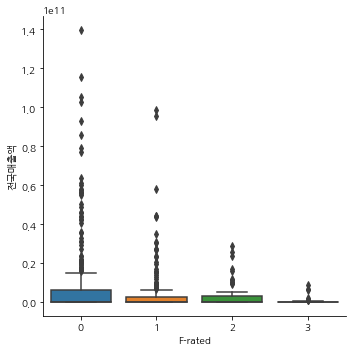

In [16]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국매출액', data=df, kind='box')

In [17]:
df[df['전국매출액']==139647979516]

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
593,극한직업,20182530,2019-01-23,한국,한국,코미디,15세이상관람가,장편,일반영화,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",씨제이이앤엠(주),292578.000000,1978.000000,139647979516.000000,16264944.000000,31858660536.000000,3638287.000000,0,이병헌,이병헌,20125862.000000,남자,감독,드림(가제)|극한직업|레슬러|바람 바람 바람|스물|오늘의 연애|타짜-신의 손|힘내세...,문충일,문충일,문충일,20303529.000000,남자,시나리오(각본),극한직업,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,허준석,한준우,김명준,나철,정재광",류승룡,고반장,10019065,남자,배우,입술은 안돼요(가제)|인생은 아름다워(가제)|극한직업|7년의 밤|염력|제5열|서울역...


In [18]:
# 극한직업 UBD
16264944 / 170000

95.6761411764706

## 2. 상영횟수 비교
* 상영횟수 중간값: F등급 0이 3의 9.5배

In [19]:
show_des = df.groupby('F-rated')['상영횟수'].describe()
show_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,354.000000,25233.711864,43970.441935,41.000000,392.250000,2867.500000,30053.250000,292578.000000
1,228.000000,15785.135965,30262.149668,45.000000,548.500000,2506.000000,16487.000000,184198.000000
2,61.000000,17126.229508,27786.919413,96.000000,477.000000,1497.000000,19653.000000,120808.000000
3,44.000000,4331.931818,9453.714194,203.000000,416.500000,617.000000,3134.750000,41970.000000


In [20]:
# 중간값 비교
show_des.iloc[0,-2] / show_des.iloc[3,-2]

9.587128160140361

<Figure size 1440x1080 with 0 Axes>

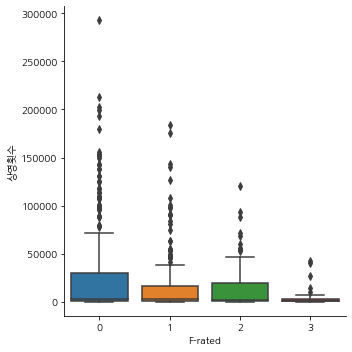

In [21]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='상영횟수', data=df, kind='box')

## 3. 상영횟수 대비 매출액 비교 
* 회당 평균 매출액 중간값 비교: F등급 0이 3의 2.4배
* 매출액을 단순비교했을 때는 27.1배였는데 2.4배로 낮아짐 -> 여성영화가 상영기회가 적은 것에 비해 좋은 결과를 내고 있음

In [22]:
df['회당 평균 매출액'] = df['전국매출액'] / df['상영횟수']

In [23]:
sales_avg_des = df.groupby('F-rated')['회당 평균 매출액'].describe()
sales_avg_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,354.000000,156427.183727,131797.868934,15922.324159,53855.093799,114423.267081,226680.012297,707758.081588
1,228.000000,133179.475687,104883.716321,12607.660455,53342.035749,95648.797236,179253.945278,561962.484410
2,61.000000,120761.295603,78441.004969,20012.500000,49014.084507,116725.768535,174283.391088,302757.481088
3,44.000000,77601.081950,51137.289253,16052.380952,40542.773789,66291.389137,94578.321865,242314.261272


In [24]:
# Cohen's d -> 이걸로 비교 못할 것 같은데...
(sales_avg_des.iloc[0,1] - sales_avg_des.iloc[3,1]) / df['회당 평균 매출액'].std()

0.6730175771705044

In [25]:
# 중간값 비교
sales_avg_des.iloc[0,-2] / sales_avg_des.iloc[3,-2]

2.3967438608375353

스크린마다 수용가능 관객수가 다르고 특정 영화만 대형관에 상영되는 것, 프라임 시간대에 배정되는 것이 중요한 feature 될 수 있음  
-> 각 영화가 어떤 스크린에서 상영했는지에 대한 데이터, 스크린별 수용인원 데이터, 상영시간표 데이터 추가로 필요

## 4. 스크린수 비교
* 스크린수는 개봉 첫 주 최대 스크린수를 의미함
* 전국스크린수 중간값: F등급 0이 3의 6.5배

In [26]:
screen_des = df.groupby('F-rated')['전국스크린수'].describe()
screen_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,354.000000,421.067797,479.984957,1.000000,25.250000,209.500000,750.250000,2235.000000
1,228.000000,332.767544,366.294558,1.000000,41.000000,184.500000,536.750000,1906.000000
2,61.000000,338.672131,384.958341,3.000000,21.000000,119.000000,576.000000,1431.000000
3,44.000000,129.045455,199.025761,11.000000,17.750000,37.000000,115.750000,790.000000


In [27]:
# 중간값 비교
screen_des.iloc[0,-2] / screen_des.iloc[3,-2]

6.481641468682505

<Figure size 1440x1080 with 0 Axes>

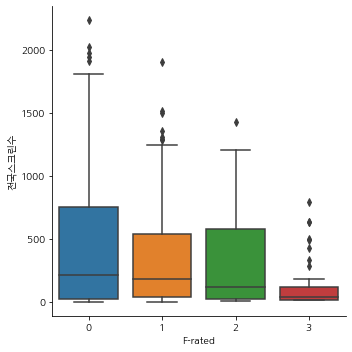

In [28]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국스크린수', data=df, kind='box')

## 5. 스크린수 대비 매출액 비교 
* 스크린당 평균 매출액 중간값 비교: F등급 0이 3의 4.2배
* 매출액을 단순비교했을 때는 27.1배였는데 4.2배로 낮아짐 -> 여성영화가 적은 스크린을 배당받고 있는 것에 비해 좋은 결과를 내고 있음

In [29]:
df['스크린당 평균 매출액'] = df['전국매출액'] / df['전국스크린수']

In [30]:
sales_avg_des2 = df.groupby('F-rated')['스크린당 평균 매출액'].describe()
sales_avg_des2

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,354.000000,8118612.611911,13528681.840116,165650.000000,738349.057315,1820817.777778,9402994.964469,98707477.678571
1,228.000000,5472315.552522,9212765.537961,168780.000000,739685.416667,1828950.759442,5625626.030567,64821022.238973
2,61.000000,4933348.129560,6183354.181490,409959.803922,871846.610169,1409438.888889,6823797.239544,24927032.609568
3,44.000000,2278917.136358,2625284.302659,364889.583333,740833.894231,1306810.980392,2233264.052795,11242552.222785


In [31]:
# 중간값 비교
sales_avg_des2.iloc[0,-2] / sales_avg_des2.iloc[3,-2]

4.210426864974207

# 배급사별 F등급 영화 비율

In [32]:
f_rating_proportion = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = (dist.groupby('F-rated')['영화명'].count() / len(dist) * 100).reset_index().rename(columns = {'영화명':cp})
    f_rating_proportion = f_rating_proportion.merge(by_dist, how='left', on='F-rated')

f_rating_proportion = f_rating_proportion.T.drop('F-rated', axis=0) 

In [33]:
f_rating_proportion.head()

,0,1,2,3
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",100.000000,nan,nan,nan
씨제이이앤엠(주),56.603774,35.849057,3.773585,3.773585
(주)넥스트엔터테인먼트월드(NEW),63.265306,28.571429,6.122449,2.040816
(주)인디플러그,33.333333,38.888889,11.111111,16.666667


In [34]:
film_numbers = df['배급사'].value_counts().reset_index().set_index('index').rename(columns={'배급사':'영화개수'})
del film_numbers.index.name
film_numbers.head()

,영화개수
씨제이이앤엠(주),53
(주)넥스트엔터테인먼트월드(NEW),49
(주)리틀빅픽쳐스,36
(주)쇼박스,32
㈜인디스토리,26


In [35]:
f_rating_proportion = f_rating_proportion.merge(film_numbers, how='inner', left_index=True, right_index=True).sort_values('영화개수')
f_rating_proportion

,0,1,2,3,영화개수
"(주)엣나인필름,(주)콘텐츠판다",nan,nan,nan,100.000000,1
"(주)이수C&E,(주)스톰픽쳐스코리아",nan,100.000000,nan,nan,1
"CGV아트하우스,(주)엣나인필름",100.000000,nan,nan,nan,1
"무브먼트,영화사 몸",100.000000,nan,nan,nan,1
(주)레인보우팩토리,100.000000,nan,nan,nan,1
(주)로카,nan,nan,nan,100.000000,1
파인스토리,100.000000,nan,nan,nan,1
"(재)CBS,(주)영화사 안다미로",nan,100.000000,nan,nan,1
모두를 위한 극장 공정영화협동조합,100.000000,nan,nan,nan,1
(주)프레인글로벌,100.000000,nan,nan,nan,1


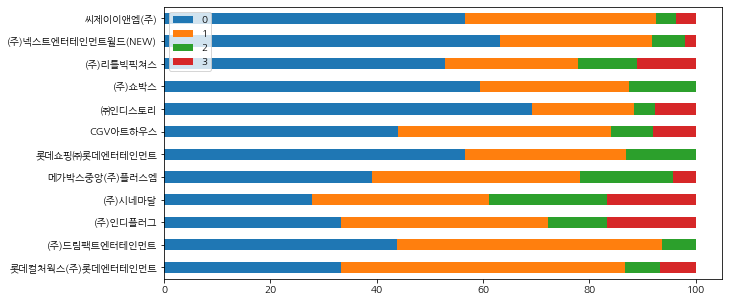

In [38]:
# 영화개수 상위 12개 배급사의 F등급 영화 비율
plt.rcParams["figure.figsize"] = (10,5)
f_rating_proportion.iloc[-12:, :4].plot(kind='barh', stacked=True)